In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

file = pd.read_csv("log.csv")

Stats column not loading properly. Needed to remove \n characters 


In [4]:
file.head()

,web-scraper-order,web-scraper-start-url,Champs,Champs-href,Stats,Stats-href
0,1670868741-1,https://www.leagueofgraphs.com/champions/builds,Aurelion Sol ...,https://www.leagueofgraphs.com/champions/build...,0.6% \n\n Popularity\n \n\n ...,https://www.leagueofgraphs.com/champions/stats...
1,1670868743-2,https://www.leagueofgraphs.com/champions/builds,Skarner ...,https://www.leagueofgraphs.com/champions/build...,0.8% \n\n Popularity\n \n\n ...,https://www.leagueofgraphs.com/champions/stats...
2,1670868745-3,https://www.leagueofgraphs.com/champions/builds,Ivern \...,https://www.leagueofgraphs.com/champions/build...,1.0% \n\n Popularity\n \n\n ...,https://www.leagueofgraphs.com/champions/stats...
3,1670868748-4,https://www.leagueofgraphs.com/champions/builds,Corki \...,https://www.leagueofgraphs.com/champions/build...,1.4% \n\n Popularity\n \n\n ...,https://www.leagueofgraphs.com/champions/stats...
4,1670868750-5,https://www.leagueofgraphs.com/champions/builds,Rek'Sai ...,https://www.leagueofgraphs.com/champions/build...,1.4% \n\n Popularity\n \n\n ...,https://www.leagueofgraphs.com/champions/stats...


In [5]:
file = file.replace(r'\n',' ', regex=True) 

In [6]:
print(file['Stats'].to_string(index=False))

0.6%                  Popularity               ...
0.8%                  Popularity               ...
1.0%                  Popularity               ...
1.4%                  Popularity               ...
1.4%                  Popularity               ...
1.4%                  Popularity               ...
1.4%                  Popularity               ...
1.5%                  Popularity               ...
1.7%                  Popularity               ...
1.7%                  Popularity               ...
1.8%                  Popularity               ...
1.8%                  Popularity               ...
2.0%                  Popularity               ...
2.0%                  Popularity               ...
2.0%                  Popularity               ...
2.1%                  Popularity               ...
2.2%                  Popularity               ...
2.2%                  Popularity               ...
2.2%                  Popularity               ...
2.3%                  Popularit

# Dropping unnecessary columns


In [7]:
file = file.drop(columns=['web-scraper-order','web-scraper-start-url','Champs-href','Stats-href'])

## Now we are left with a nice table that shows all 162 current characters that are playable with the core statistic, popularity. Popularity percentage is the amount of games in the world that a particular character is present in. For example Kai'sa is in 23% of all total games played globally. That is an insane statistic.

In [8]:
file = file.rename(columns = {'Champs':'champion'})

In [9]:
file.head()

,champion,Stats
0,Aurelion Sol ...,0.6% Popularity ...
1,Skarner ...,0.8% Popularity ...
2,Ivern ...,1.0% Popularity ...
3,Corki ...,1.4% Popularity ...
4,Rek'Sai ...,1.4% Popularity ...


# Importing games data

In [10]:
file2 = pd.read_csv("LOLmatch.csv")

In [11]:
file2.head()

,Unnamed: 0,d_spell,f_spell,champion,side,role,assists,damage_objectives,damage_building,damage_turrets,...,kda,kills,level,time_cc,damage_total,damage_taken,total_minions_killed,turret_kills,vision_score,result
0,0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,...,1.111111,1,11,39,13802,17876,25,0,59,False
1,1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,...,2.000000,3,14,26,84282,17148,166,3,24,True
2,2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,...,3.571429,12,14,34,109405,26211,147,1,29,False
3,3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,...,1.500000,3,12,21,109911,22136,25,0,29,False
4,4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,...,1.000000,1,8,14,17853,6680,37,0,20,False


In [12]:
file2 = file2.drop(columns=['Unnamed: 0','d_spell','f_spell','side'])

In [13]:
file2.head()

,champion,role,assists,damage_objectives,damage_building,damage_turrets,deaths,gold_earned,kda,kills,level,time_cc,damage_total,damage_taken,total_minions_killed,turret_kills,vision_score,result
0,Leona,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False
1,Ashe,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24,True
2,Galio,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29,False
3,Nunu,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29,False
4,Nautilus,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20,False


In [18]:
RoleCount=file2.groupby('role')['champion'].count().reset_index()

# Role popularity

In [19]:
RoleCount

,role,champion
0,Lane.bot_lane,1105
1,Lane.jungle,1227
2,Lane.mid_lane,1151
3,Lane.top_lane,1198
4,Lane.utility,1090


Text(0, 0.5, 'Number of players of each role')

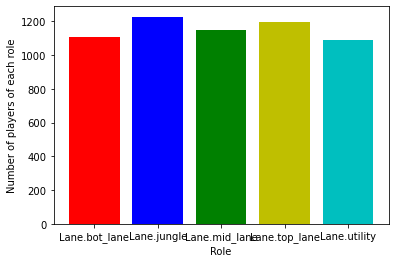

In [41]:
plt.bar(RoleCount.role,RoleCount.champion,color=['r','b','g','y','c'])
plt.xlabel("Role")
plt.ylabel("Number of players of each role")

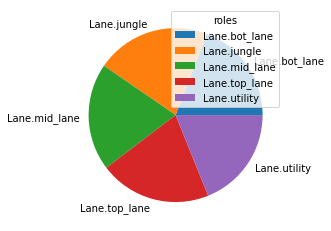

In [46]:
plt.pie(RoleCount.champion, labels=RoleCount.role)
plt.legend(title="roles")

([<matplotlib.patches.Wedge at 0x2b4d6bbd4f0>,
 [Text(0.8448467165131546, 0.7044388018819958, 'Lane.bot_lane'),
  Text(-0.5123428562567789, 0.9733985810769635, 'Lane.jungle'),
  Text(-1.0667324320926146, -0.2684807596863802, 'Lane.mid_lane'),
  Text(-0.004870766316994866, -1.0999892161450882, 'Lane.top_lane'),
  Text(0.9849196060793839, -0.4898299394284014, 'Lane.utility')])

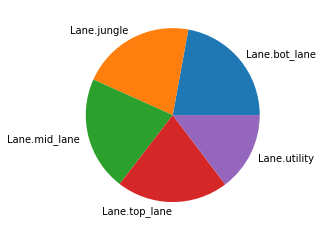

In [70]:
test =file2.groupby('role')['gold_earned'].mean().reset_index()
test
plt.pie(test.gold_earned, labels=test.role)

Text(0, 0.5, '')

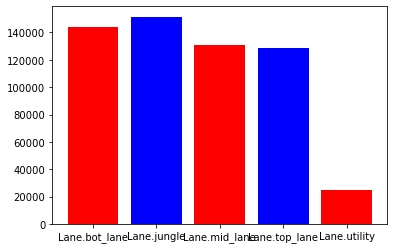

In [72]:
test2 =file2.groupby('role')['damage_total'].mean().reset_index()
test2
plt.bar(test2.role,test2.damage_total,color=['r','b'])
plt.xlabel("Roles")
plt.ylabel("Damage Totals")

In [81]:
file.tail()

,champion,Stats
157,Zed ...,18.0% Popularity ...
158,Caitlyn ...,19.4% Popularity ...
159,Sylas ...,19.9% Popularity ...
160,Ezreal ...,21.2% Popularity ...
161,Kai'Sa ...,22.7% Popularity ...
